# Business Problem:
To understand the influence of the given attributes on students performance  in 3 different scores.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

# Analysing the Basic Information of the Dataset

In [3]:
data.head() #top 5 instances

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail() #last 5 instances

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
data.shape #there are 1000 instances and 8 attributes

(1000, 8)

In [6]:
data.info() #basic data info :All non null valaues with 3 numerical attributes and 5 categorical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.sample(10) #extracting 10 random instances of the data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
132,male,group E,some college,free/reduced,completed,87,74,70
836,male,group E,high school,standard,none,73,64,57
110,female,group D,associate's degree,free/reduced,completed,77,89,98
376,female,group D,some high school,standard,none,80,90,82
837,female,group A,high school,standard,completed,75,82,79
690,female,group C,associate's degree,standard,none,49,53,53
839,female,group C,associate's degree,standard,none,66,77,73
54,female,group C,some high school,free/reduced,completed,71,84,87
754,male,group C,associate's degree,free/reduced,none,58,55,53


## Descriptive Statistical Analysis

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Extracting sub categories of every categorical value:

In [9]:
data['gender'].unique() #gender has two sub categories - Female and Male

array(['female', 'male'], dtype=object)

In [10]:
data['gender'].value_counts() #there are in total 518 females and 482 males

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Males Vs Females')

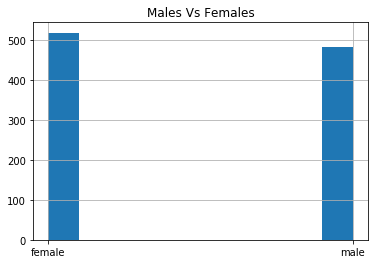

In [11]:
data['gender'].hist()
plt.title('Males Vs Females')

In [12]:
data['race/ethnicity'].unique() #race is divided into 5 groups named from A to E 

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
data['race/ethnicity'].value_counts() #majority of students lie in group C and minority exits in group A of race

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

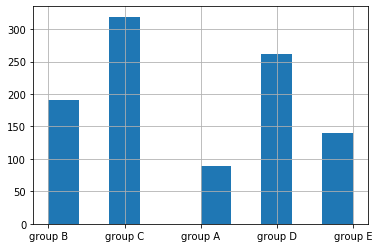

In [14]:
data['race/ethnicity'].hist()

In [15]:
for i in data['parental level of education'].unique():
    print (i)

bachelor's degree
some college
master's degree
associate's degree
high school
some high school


In [16]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

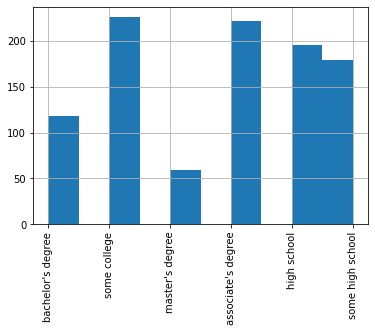

In [17]:
data['parental level of education'].hist()
plt.xticks(rotation='vertical')
plt.show()

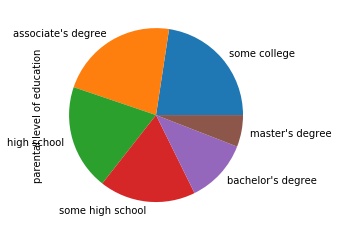

In [18]:
data['parental level of education'].value_counts().plot.pie()

1. Parents' qualification is also divided into 6 groups. 
2. Most of the students' parents are having some college level qualifcation which is not known accurately.
3. Only 59 students' parents are having master's Degree.
4. Associate Degree is usually of 2 years ie Diploma.

In [19]:
data['lunch'].unique() # Students have either standard lunch or Free/ Reduced Lunch

array(['standard', 'free/reduced'], dtype=object)

In [20]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

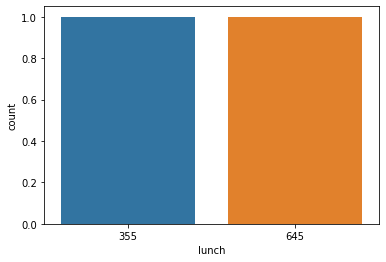

In [21]:
sns.countplot(x=data['lunch'].value_counts())

1. Students have either standard lunch or Free/ Reduced Lunch.
2. Majority of students have a proper standard lunch.


In [22]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [23]:
a=data['test preparation course'].value_counts()
a

none         642
completed    358
Name: test preparation course, dtype: int64

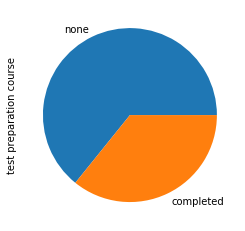

In [24]:
a.plot.pie()

1. As far as the column name suggests, there was a test preparation course available.
2. Students either completed the course or didn't take the course itself.There was no case where students took it but didnt complete.
3. Majority(642) of the students didnt take the course.

### Analysing the target variable:

The whole data deals with various attributes which influence the students' performances in 3 different marks(math score,reading score,writing score). So our target variable(s) are these marks.

Now if we think we can consider these targets individually as well as a sum also beacause at the end of the day we want to measure the performance.

In [25]:
data['Total Marks']=data['math score']+data['reading score']+data['writing score']

In [26]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [27]:
# Checking the distribution of the target values
columns=['math score','reading score','writing score','Total Marks']

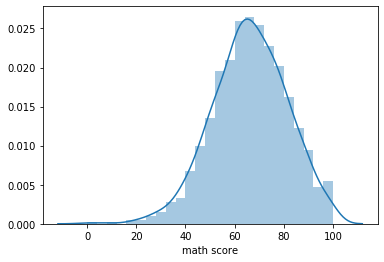

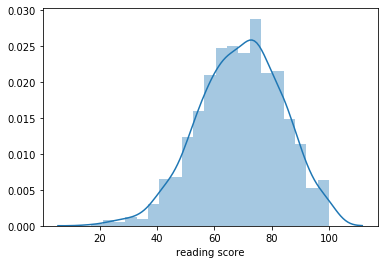

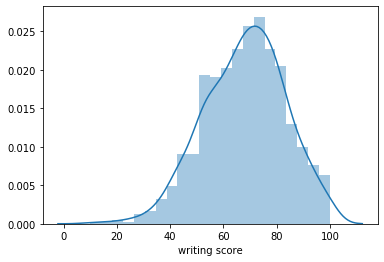

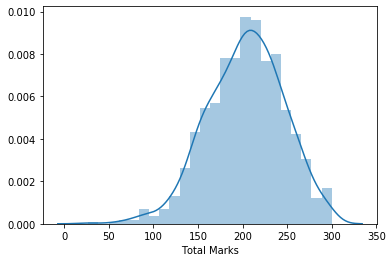

In [28]:
for i in columns:
    sns.distplot(data[i])
    plt.show()

It is very much clear that there is no skewness in the Target Columns,

## Inferential Analysis:

### Univariate:

Lets check the following things:
1. How many students secured 50% marks or more in maths , reading and writing?
2. How many students didnt pass (below 30%) in maths , reading and writing?
3. How many students didn't pass in any of the subjects?

#### 1.  How many students secured 50% marks or more in maths , reading and writing?

In [29]:
#maths score

data[data['math score']>50].shape #150 students scored more than 50% in math

(850, 9)

In [30]:
#probability of stds scoring more than 50 % in maths score:

c=len(data[data['math score']>50])/len(data['math score']) 
c

0.85

In [31]:
#reading score

data[data['reading score']>50].shape #97 students scored more than 50% in reading

(903, 9)

In [32]:
#probability of stds scoring more than 50 % in reading score:

a=len(data[data['reading score']>50])/len(data['reading score'])
a

0.903

In [33]:
#writing score

data[data['writing score']>50].shape #124 students scored more than 50% in reading

(876, 9)

In [34]:
#probability of stds scoring more than 50 % in writing score:

b=len(data[data['writing score']>50])/len(data['writing score'])
b

0.876

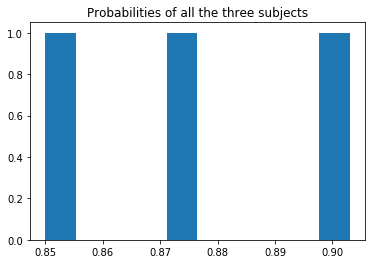

In [35]:
plt.hist([a,b,c])
plt.title('Probabilities of all the three subjects')
plt.show()

---  From the above stats we can infer that out of all the three subject , students' probability of scoring ateast 50% or more is highest in reading then in writing and then in maths.

#### 2. How many students didnt pass (below 30%) in maths , reading and writing?

In [36]:
#maths 

data[data['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
17,female,group B,some high school,free/reduced,none,18,32,28,78
59,female,group C,some high school,free/reduced,none,0,17,10,27
91,male,group C,high school,free/reduced,none,27,34,36,97
145,female,group C,some college,free/reduced,none,22,39,33,94
327,male,group A,some college,free/reduced,none,28,23,19,70
338,female,group B,some high school,free/reduced,none,24,38,27,89
363,female,group D,some high school,free/reduced,none,27,34,32,93
466,female,group D,associate's degree,free/reduced,none,26,31,38,95
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,117
601,female,group C,high school,standard,none,29,29,30,88


In [37]:
len(data[data['math score']<30])/len(data)

#proba of not passing in maths is 0.014

0.014

Inference:
1. Interestingly, No student of group E failed in maths.
2. Children of parents who had master's degree didnt fail in maths.

In [38]:
#reading 

data[data['reading score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
59,female,group C,some high school,free/reduced,none,0,17,10,27
76,male,group E,some high school,standard,none,30,26,22,78
211,male,group C,some college,free/reduced,none,35,28,27,90
327,male,group A,some college,free/reduced,none,28,23,19,70
596,male,group B,high school,free/reduced,none,30,24,15,69
601,female,group C,high school,standard,none,29,29,30,88
896,male,group B,high school,free/reduced,none,36,29,27,92
980,female,group B,high school,free/reduced,none,8,24,23,55


Few Inferences:
1. All those who failed in reading didnt take test prep course. 
2. No student of group D failed Reading test.
3. Students whose parental level eduction is above high school didn't fail the reading test.

In [39]:
len(data[data['reading score']<30])/len(data)

# Probability of not passing in reading is as low as .008

0.008

In [40]:
#writing 

data[data['writing score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
17,female,group B,some high school,free/reduced,none,18,32,28,78
59,female,group C,some high school,free/reduced,none,0,17,10,27
76,male,group E,some high school,standard,none,30,26,22,78
211,male,group C,some college,free/reduced,none,35,28,27,90
327,male,group A,some college,free/reduced,none,28,23,19,70
338,female,group B,some high school,free/reduced,none,24,38,27,89
596,male,group B,high school,free/reduced,none,30,24,15,69
896,male,group B,high school,free/reduced,none,36,29,27,92
980,female,group B,high school,free/reduced,none,8,24,23,55


Few Inferences:
1.  All those who failed in Writing didnt take test prep course. 
2. No student of group D failed writing test.
3. Students whose parental level eduction is above high school didn't fail the writing test.

In [41]:
len(data[data['writing score']<30])/len(data)

# Probability of not passing in writing is as low as .009

0.009

#### 3. How many students didn't pass in any of the subjects?

In [42]:
data[(data['math score']<30)& (data['reading score']<30)& (data['writing score']<30)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
59,female,group C,some high school,free/reduced,none,0,17,10,27
327,male,group A,some college,free/reduced,none,28,23,19,70
980,female,group B,high school,free/reduced,none,8,24,23,55


In [43]:
#we can also do so using merge function

In [44]:
Q=pd.merge(data[data['reading score']<30],data[data['math score']<30],how='inner')
Q

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,male,group A,some college,free/reduced,none,28,23,19,70
2,female,group C,high school,standard,none,29,29,30,88
3,female,group B,high school,free/reduced,none,8,24,23,55


In [45]:
z=pd.merge(Q,data[data['writing score']<30])
z

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,male,group A,some college,free/reduced,none,28,23,19,70
2,female,group B,high school,free/reduced,none,8,24,23,55


-----There were 3 students(2 females and 1 male) who failed in all the subjects and these students didnt take test preparation course and had free/ reduced lunch.  


 Few Inferences:
1. No student who belonged to group D and E failed all the 3 tests.
2. No student who had standard lunch failed all the 3 tests.
3. Students whose parents had associate , bachelor's degree or masters degree didnt fail in all the subject. 

#### 4. How many students passed 2 out of 3 Subjects?


In [46]:
#failed in maths and passed in reading and writing 
m=data[data['math score']<30].merge(pd.merge(data[data['reading score']>30] ,
                                             data[data['writing score']>30], how='inner'),how='inner')
m.shape

(8, 9)

In [47]:
m

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks
0,male,group C,high school,free/reduced,none,27,34,36,97
1,female,group C,some college,free/reduced,none,22,39,33,94
2,female,group D,some high school,free/reduced,none,27,34,32,93
3,female,group D,associate's degree,free/reduced,none,26,31,38,95
4,female,group D,bachelor's degree,free/reduced,none,29,41,47,117
5,female,group C,some high school,free/reduced,completed,29,40,44,113
6,female,group B,some college,standard,none,19,38,32,89
7,female,group B,high school,free/reduced,completed,23,44,36,103


In [48]:
#failed in reading but passed in math and writing
n=data[data['reading score']<30].merge(pd.merge(data[data['math score']>30] , data[data['writing score']>30], how='inner'),how='inner')
n.shape

(0, 9)

In [49]:
#failed in writing but passed in math and reading
o=data[data['writing score']<30].merge(pd.merge(data[data['math score']>30] 
                                                , data[data['reading score']>30], how='inner'),how='inner')
o.shape

(0, 9)

 Few Inferences:
1. In total there were 8 students who passed two out of three subjects.
2. All these 8 students failed in maths and passed the other two subjects.
3. No student failed in writing and passed the other two or failed in reading and passed the other two.
4. 7 of these students are females.
5. None of these students belonged to group A and E.


### Bivariate Analysis:

Lets check :
    1. How many females/males scored 80% or more in  maths , reading and writing?
    2. How is parents level of education related to the students' performance?
    3. How is lunch attribute involved in performance of the students?
    4. How many students took test prep. course and scred more than 80% in all subjects?
    5. Of what race , students who scored more than 80% belonged?


#### 1. How many females/males scored 80% or more in  maths , reading and writing?

In [50]:
f=data.groupby('gender').get_group('female')[(data['math score'] > 80) & 
     (data['writing score'] > 80) &
     (data['reading score'] > 80)].shape
f

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(65, 9)

There were 65 females who scored 80% in all the 3 subjects.

In [51]:
m=data.groupby('gender').get_group('male')[(data['math score']>80)&
                                          (data['reading score']>80) &
                                          (data['writing score']>80)].shape
m

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(45, 9)

There were 45 male students who secured 80% or more in all three subjects.

Inference:
   1.  Females were more studious as 65 females scored 80 % and 45 males secured 80%.

#### 2. How is parents level of education related to the students' performance?

I am here considering students' total performance out of 300.

In [52]:
for y in data['parental level of education'].unique():
    print(y,':',data.groupby('parental level of education').get_group(y)[data['Total Marks']>=200].shape)

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


bachelor's degree : (80, 9)
some college : (129, 9)
master's degree : (39, 9)
associate's degree : (132, 9)
high school : (86, 9)
some high school : (90, 9)


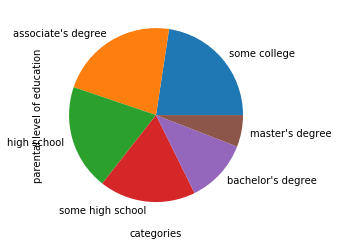

In [53]:
data['parental level of education'].value_counts().plot.pie()
plt.xlabel('categories')

plt.show()

Inference:
    1. There are 80 students whose parents had bachelor's degree and scored 200 or more marks out of 300.
    2. There are 129 students whose parents had some college's degree and scored 200 or more marks out of 300.
    3. There are 39 students whose parents had master's degree and scored 200 or more marks out of 300.
    4. There are 132 students whose parents had associate's degree and scored 200 or more marks out of 300.
    5. There are 86 students whose parents had high school's education and scored 200 or more marks out of 300.
    6. There are 90 students whose parents has some high school eduction and scored 200 or more marks out of 300.
    
###### Main Inference: Performance of students whose parents had associate degree is better overall.

 #### 3. How is lunch attribute involved in performance of the students overall?

In [54]:
data[data['lunch']=='standard'][data['Total Marks']>200].shape

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(408, 9)

In [55]:
data[data['lunch']=='free/reduced'][data['Total Marks']>200].shape

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(140, 9)

Inference:
    1. Above mentioned code shows students who had standard/free/reduced lunch and scored more than 200.
    2. Students who had standard lunch performed well as compared to students who had free or reduced lunch.
    
##### Main Inference:
A proper standard lunch plays an important role in students' performance .
    

#### 4.How many students took/didn't take test prep. course and scored more than 80% in all subjects?

In [56]:
#students who didnt take the prep course but scored more than 80% in each subject
data[data['test preparation course']=='none'][(data['math score']>80)& (data['reading score']>80)& (data['writing score']>80)].shape

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(49, 9)

In [57]:
#students who took the prep courseand scored more than 80% in each subject
data[data['test preparation course']=='completed'][(data['math score']>80)& (data['reading score']>80)& (data['writing score']>80)].shape

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(61, 9)

Inference :
    1. There were 61 students who completed the course and scored more than 80 percent in all the tests.
    2. There were 49 students who didnt take the course but still scored more than 80 % in all the tests.
##### Main Inference:
    There is no significant increase in performance of no. of std who took the course when compared to the students didnt take the course.

#### 5. Of what race , students who scored more than 80% belonged?

In [58]:
for i in data['race/ethnicity'].unique():
    print(i,data.groupby('race/ethnicity').get_group('group A')[(data['math score']>80)&
                                                                (data['reading score']>80)&(data['writing score']>80)].shape)

C:\Users\Shweta Chopra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


group B (7, 9)
group C (7, 9)
group A (7, 9)
group D (7, 9)
group E (7, 9)


Inference :
    There were 7 students in each of the group who scored more than 80% in all the subjects.
#### Main Inference:
    Race doesnt impact the performance of the students collectively.

## Converting Performance(Marks) into Grades

In [59]:
def Grade(d):
      if d>=250:
        return('Grade A: Excellent')
      elif d>=195:
        return('Grade B: Good')
      elif d>=150:
        return('Grade C: Satisfactory')
      elif d<150 and d>=110:
        return ('Grade D: Could do better')
      else :
        return('Grade E: Needs Improvement')

In [60]:
data['Final Grades']=data.apply(lambda x:Grade(x['Total Marks']),axis=1)
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Final Grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Grade B: Good


### Analysing the Final Grades:

In [61]:
fg=data['Final Grades'].value_counts()
fg

Grade B: Good                 462
Grade C: Satisfactory         296
Grade A: Excellent            139
Grade D: Could do better       85
Grade E: Needs Improvement     18
Name: Final Grades, dtype: int64

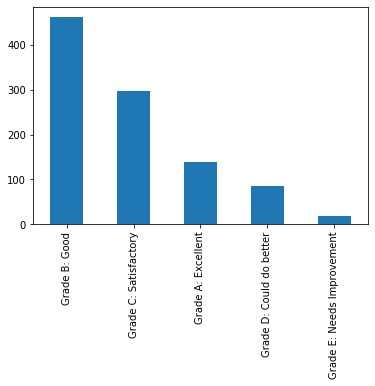

In [62]:
fg.plot(kind='bar')

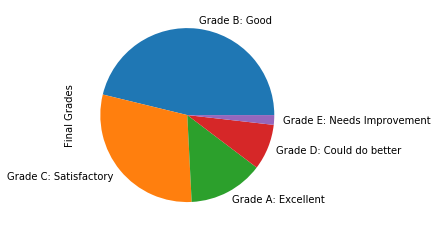

In [63]:
data['Final Grades'].value_counts().plot.pie()

Inference :
   
   We can see that the majority(nearly 50%)students performed good in the exams i.e. their overall marks were between 195 to 250 out of 300.

#### Lets go deep into the relationship of attributes with the final grades:

In [64]:
#statistics of final grades and parents' education:
pd.crosstab(data['Final Grades'],data['parental level of education'])

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Final Grades,,,,,,
Grade A: Excellent,39,24,8,19,32,17
Grade B: Good,101,61,91,21,106,82
Grade C: Satisfactory,65,25,64,18,73,51
Grade D: Could do better,16,8,27,1,10,23
Grade E: Needs Improvement,1,0,6,0,5,6


1. No students whose parents had Master's or Bachelor's degree got Grade E.


In [65]:
#statistics of final grades and gender:
pd.crosstab(data['gender'],data['Final Grades'])

Final Grades,Grade A: Excellent,Grade B: Good,Grade C: Satisfactory,Grade D: Could do better,Grade E: Needs Improvement
gender,,,,,
female,91,249,139,27,12
male,48,213,157,58,6


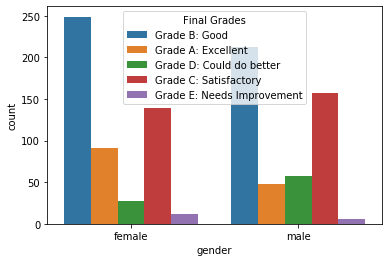

In [66]:
sns.countplot(x = data['gender'], data = data, hue = data['Final Grades'])

1. we can see that females were better as 91 of the females got excellent marks as compared to 48 males.

In [67]:
#statistics of final grades and lunch:
pd.crosstab(data['lunch'],data['Final Grades'])

Final Grades,Grade A: Excellent,Grade B: Good,Grade C: Satisfactory,Grade D: Could do better,Grade E: Needs Improvement
lunch,,,,,
free/reduced,22,133,139,46,15
standard,117,329,157,39,3


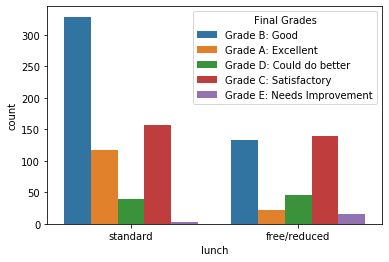

In [68]:
sns.countplot(data['lunch'],hue=data['Final Grades'])

1. Standard lunch eaters performed well in terms of grades.

In [69]:
#statistics of final grades and race
pd.crosstab(data['Final Grades'],data['race/ethnicity'])

race/ethnicity,group A,group B,group C,group D,group E
Final Grades,,,,,
Grade A: Excellent,9,19,39,38,34
Grade B: Good,30,78,149,135,70
Grade C: Satisfactory,34,66,99,70,27
Grade D: Could do better,15,20,26,17,7
Grade E: Needs Improvement,1,7,6,2,2


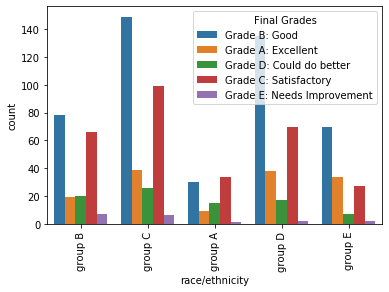

In [70]:
sns.countplot(data['race/ethnicity'],hue=data['Final Grades'])
plt.xticks(rotation='vertical')
plt.show()

1. Around 150 students of group C secured good grades.

In [71]:
pd.crosstab(data['test preparation course'],data['Final Grades'])

Final Grades,Grade A: Excellent,Grade B: Good,Grade C: Satisfactory,Grade D: Could do better,Grade E: Needs Improvement
test preparation course,,,,,
completed,77,194,69,17,1
none,62,268,227,68,17


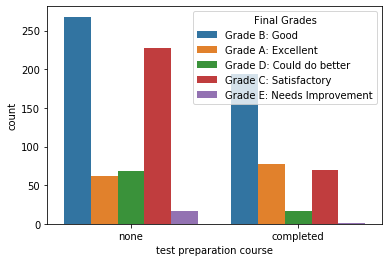

In [72]:
sns.countplot(data['test preparation course'],hue=data['Final Grades'])

1. Those who didn't take test prep. course scored good grades overall.

# Data Cleaning:

In [73]:
#checking missing values:

data.isnull().sum()
#no null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total Marks                    0
Final Grades                   0
dtype: int64

In [74]:
#conversion of categorical values into Numerical values:

####  Label Encoder:

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()
data['Male_student']=le.fit_transform(data['gender'])
data['Standard lunch']=le.fit_transform(data['lunch'])
data['No prep. course taken']=le.fit_transform(data['test preparation course'])

In [77]:
data[['Male_student','gender']]

,Male_student,gender
0,0,female
1,0,female
2,0,female
3,1,male
4,1,male
...,...,...
995,0,female
996,1,male
997,0,female
998,0,female


In [78]:
data[['Standard lunch','lunch']]

,Standard lunch,lunch
0,1,standard
1,1,standard
2,1,standard
3,0,free/reduced
4,1,standard
...,...,...
995,1,standard
996,0,free/reduced
997,0,free/reduced
998,1,standard


In [79]:
data[['No prep. course taken','test preparation course']]

,No prep. course taken,test preparation course
0,1,none
1,0,completed
2,1,none
3,1,none
4,1,none
...,...,...
995,0,completed
996,1,none
997,0,completed
998,0,completed


In [80]:
#removing gender and lunch columns:

data=data.drop(['gender','lunch','test preparation course'],axis=1)

#### Category Encoder:

In [81]:
import category_encoders as ce

In [82]:
data.head(1)

,race/ethnicity,parental level of education,math score,reading score,writing score,Total Marks,Final Grades,Male_student,Standard lunch,No prep. course taken
0,group B,bachelor's degree,72,72,74,218,Grade B: Good,0,1,1


In [83]:
encoder=ce.OrdinalEncoder()
data["Parent's Education"]=encoder.fit_transform(data['parental level of education'])

In [84]:
encoder1=ce.OrdinalEncoder()
data['Race groups']=encoder1.fit_transform(data['race/ethnicity'])

In [85]:
data[['Race groups','race/ethnicity']]

,Race groups,race/ethnicity
0,1,group B
1,2,group C
2,1,group B
3,3,group A
4,2,group C
...,...,...
995,5,group E
996,2,group C
997,2,group C
998,4,group D


In [86]:
data[["Parent's Education",'parental level of education']]

,Parent's Education,parental level of education
0,1,bachelor's degree
1,2,some college
2,3,master's degree
3,4,associate's degree
4,2,some college
...,...,...
995,3,master's degree
996,5,high school
997,5,high school
998,2,some college


In [87]:
data=data.drop(['parental level of education','race/ethnicity'],axis=1)

In [88]:
data['Final Grades'].unique()

array(['Grade B: Good', 'Grade A: Excellent', 'Grade D: Could do better',
       'Grade C: Satisfactory', 'Grade E: Needs Improvement'],
      dtype=object)

#### Label Mapping:

In [89]:
data['Mapped_Final_Grades']=data['Final Grades'].map({'Grade A: Excellent':1,'Grade B: Good':2,'Grade C: Satisfactory':3,'Grade D: Could do better':4,
                                             'Grade E: Needs Improvement':5 })

In [90]:
### Scaling the data:


In [91]:
data[['Final Grades','Mapped_Final_Grades']]

,Final Grades,Mapped_Final_Grades
0,Grade B: Good,2
1,Grade B: Good,2
2,Grade A: Excellent,1
3,Grade D: Could do better,4
4,Grade B: Good,2
...,...,...
995,Grade A: Excellent,1
996,Grade C: Satisfactory,3
997,Grade B: Good,2
998,Grade B: Good,2


In [92]:
data=data.drop('Final Grades',axis=1)

In [93]:
data

,math score,reading score,writing score,Total Marks,Male_student,Standard lunch,No prep. course taken,Parent's Education,Race groups,Mapped_Final_Grades
0,72,72,74,218,0,1,1,1,1,2
1,69,90,88,247,0,1,0,2,2,2
2,90,95,93,278,0,1,1,3,1,1
3,47,57,44,148,1,0,1,4,3,4
4,76,78,75,229,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,0,1,0,3,5,1
996,62,55,55,172,1,0,1,5,2,3
997,59,71,65,195,0,0,0,5,2,2
998,68,78,77,223,0,1,0,2,4,2


## Scaling the Data

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

In [97]:
data=scaler.fit_transform(data)

In [98]:
data

array([[0.72      , 0.6626506 , 0.71111111, ..., 0.        , 0.        ,
        0.25      ],
       [0.69      , 0.87951807, 0.86666667, ..., 0.2       , 0.25      ,
        0.25      ],
       [0.9       , 0.93975904, 0.92222222, ..., 0.4       , 0.        ,
        0.        ],
       ...,
       [0.59      , 0.65060241, 0.61111111, ..., 0.8       , 0.25      ,
        0.25      ],
       [0.68      , 0.73493976, 0.74444444, ..., 0.2       , 0.75      ,
        0.25      ],
       [0.77      , 0.8313253 , 0.84444444, ..., 0.2       , 0.75      ,
        0.25      ]])